# IMPORTING THE LIBRARIES

Подключение Google Drive

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
#import os
#import sys
#sys.path.insert(1, '/content/gdrive/MyDrive/ADfromPython')

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# DATA PRE-PROCESSING

## Download data

In [2]:
df = pd.read_csv("DATE.csv", sep=';', parse_dates=True) # "/content/gdrive/MyDrive/ADfromPython/DATE.csv"

# Переименование столбцов
print(df.columns.to_list())
df.columns = ['input_1', 'input_2', 'input_3', 'input_4', 'input_5', 'output']
df.columns.to_list()

['D4420', 'D4433', '4U27', '4U32', 'L4115', 'D4428']


['input_1', 'input_2', 'input_3', 'input_4', 'input_5', 'output']

## Statistics and information about the dataset.


In [3]:
from utils.df_describe import print_df_describe

print_df_describe(df=df, name='DF', show=True)

DF (head of the data is):
   input_1  input_2  input_3  input_4  input_5   output
0  1093.80  1848.89     3.78    16.64     1.54  1181.18
1  1097.53  1897.28     3.77    16.65     1.53  1177.49
2  1093.53  1935.90     3.73    16.64     1.53  1177.71
3  1101.58  1998.96     3.74    16.75     1.54  1180.94
4  1103.64  2019.86     3.74    14.93     1.54  1185.77

DF (describe of the data is):
            input_1       input_2       input_3       input_4       input_5  \
count  44640.000000  44640.000000  44640.000000  44640.000000  44640.000000   
mean    1123.163368   1864.407627     19.208756     17.285504      1.573224   
std       34.349140    152.803526     20.023350     13.928399      0.144934   
min     1000.000000   1200.460000      0.000000      0.000000      1.440000   
25%     1105.910000   1815.830000      6.447500     12.660000      1.540000   
50%     1123.580000   1895.750000     12.600000     16.170000      1.550000   
75%     1144.930000   1954.792500     25.010000     19

## Signals graphics

Общий график (выбор временного интервала)

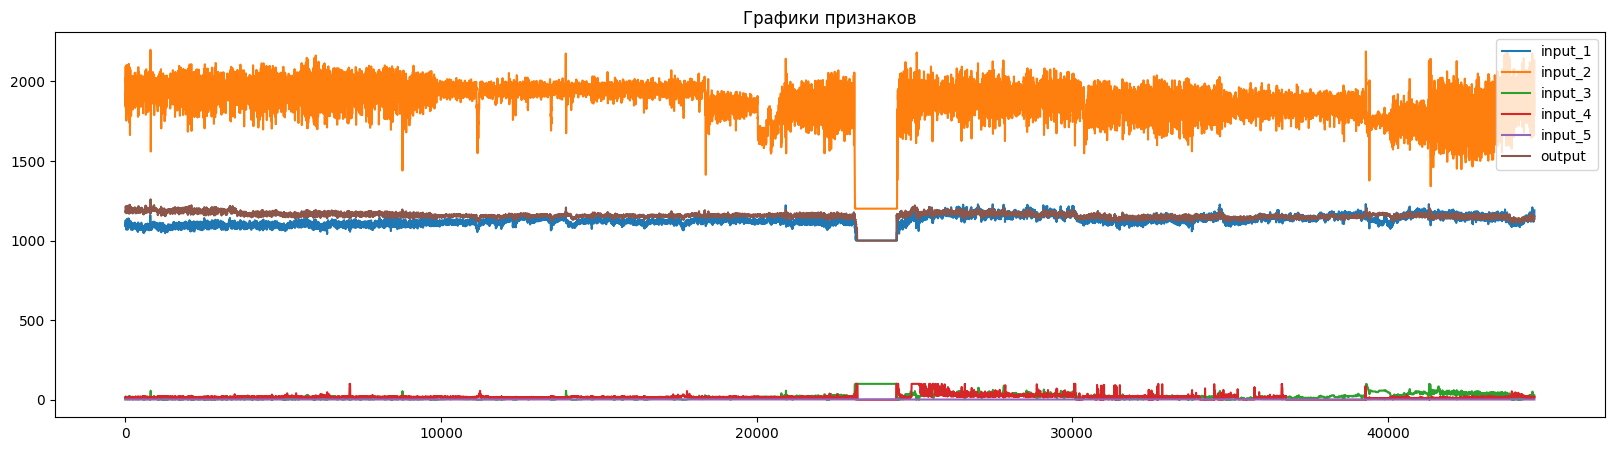

In [5]:
plt.figure(figsize=(20,5))
for col_name in df.columns.to_list():
  df[col_name].plot()
plt.title('Графики признаков')
plt.legend()

Графики сигналов и гистограммы распределения

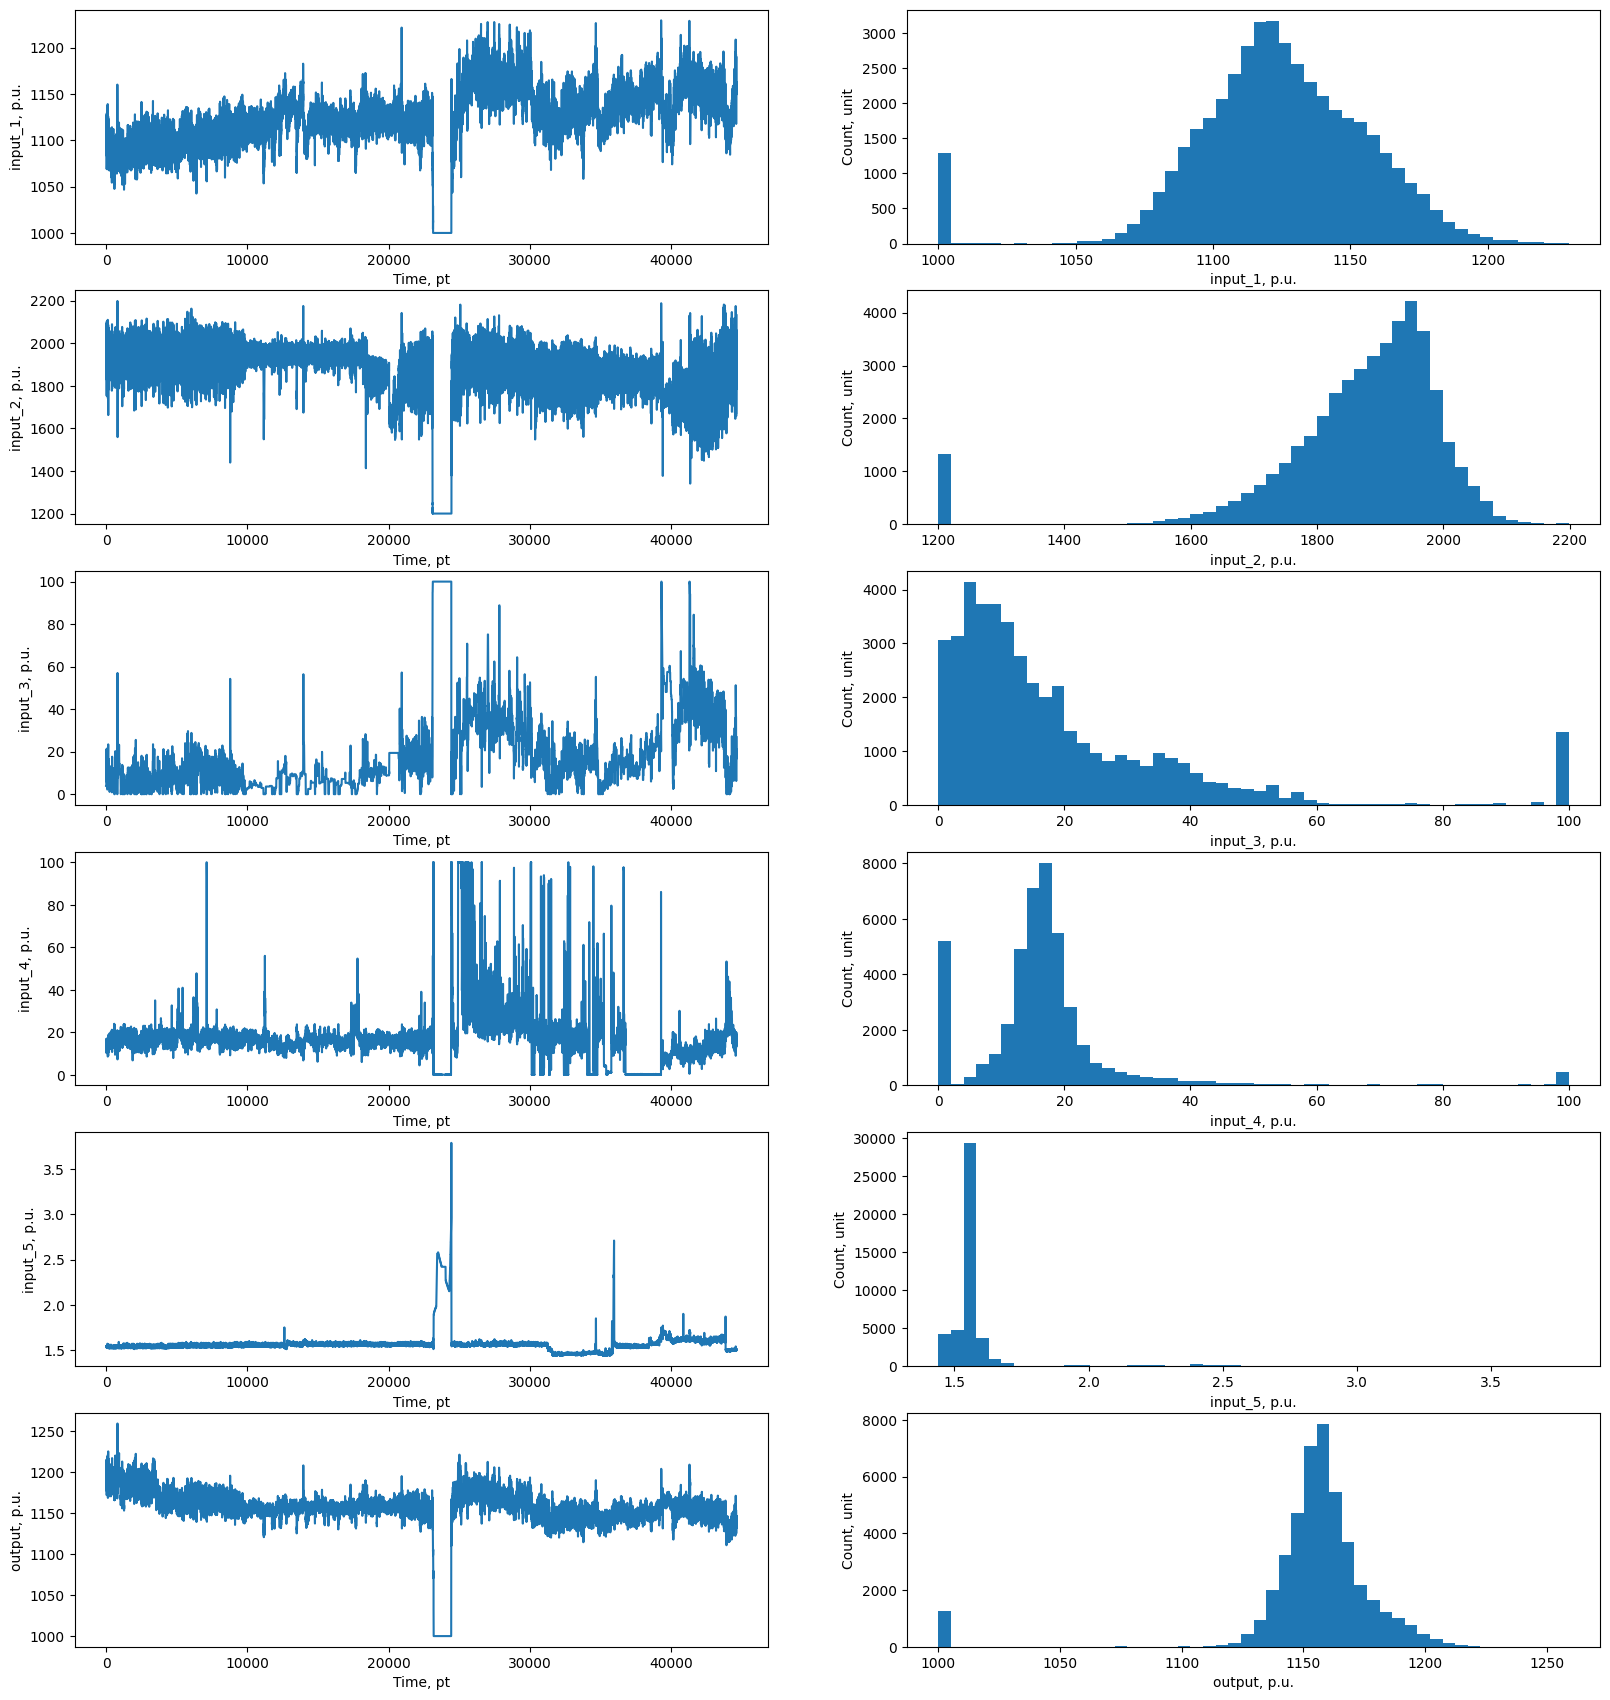

In [6]:
from utils.plot import cm


colums = df.columns.to_list()
fig, axs = plt.subplots(nrows=len(colums), ncols=2, figsize=cm(inch=[50, len(colums)*9]))
for ids, col_name in enumerate(colums):
    axs[ids, 0].plot(df[col_name])
    axs[ids, 0].set_xlabel('Time, pt')
    axs[ids, 0].set_ylabel(f'{col_name}, p.u.')

    axs[ids, 1].hist(df[col_name], bins=50)
    axs[ids, 1].set_xlabel(f'{col_name}, p.u.')
    axs[ids, 1].set_ylabel('Count, unit')
plt.show()

## Signal Correlation

Общая матрица корреляции

<Axes: >

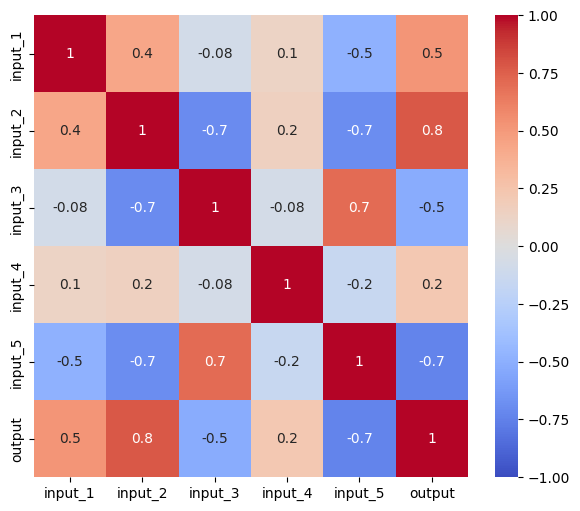

In [7]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')

Матрица корреляции выходного сигнала от входных

In [8]:
df.corr()['output'].sort_values(ascending=False)[1:]

input_2    0.774534
input_1    0.517408
input_4    0.224615
input_3   -0.520277
input_5   -0.737570
Name: output, dtype: float64

# PREPARING THE DATASET TO TRAIN THE MODEL

## Выбор отрезка данных

In [9]:
data_work = df[0:10000]

In [10]:
from utils.df_describe import print_df_describe

print_df_describe(df=data_work, name='Data Work', show=True)

Data Work (head of the data is):
   input_1  input_2  input_3  input_4  input_5   output
0  1093.80  1848.89     3.78    16.64     1.54  1181.18
1  1097.53  1897.28     3.77    16.65     1.53  1177.49
2  1093.53  1935.90     3.73    16.64     1.53  1177.71
3  1101.58  1998.96     3.74    16.75     1.54  1180.94
4  1103.64  2019.86     3.74    14.93     1.54  1185.77

Data Work (describe of the data is):
            input_1       input_2       input_3       input_4       input_5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    1097.570410   1946.990724      8.331382     17.286128      1.541739   
std       14.877788     78.592410      5.589553      5.007198      0.011022   
min     1042.530000   1439.900000      0.000000      6.790000      1.510000   
25%     1087.670000   1896.050000      4.370000     15.090000      1.530000   
50%     1096.910000   1952.510000      7.740000     16.865000      1.540000   
75%     1107.292500   2005.212500     11

## Разделение на входные/выходные переменные

In [11]:
feature_rows = ['input_1', 'input_2', 'input_3', 'input_4', 'input_5']
target_rows = ['output']

In [12]:
features = data_work[feature_rows]
target = data_work[target_rows]

In [13]:
from utils.df_describe import print_df_describe

print_df_describe(df=features, name='Features', show=True)

Features (head of the data is):
   input_1  input_2  input_3  input_4  input_5
0  1093.80  1848.89     3.78    16.64     1.54
1  1097.53  1897.28     3.77    16.65     1.53
2  1093.53  1935.90     3.73    16.64     1.53
3  1101.58  1998.96     3.74    16.75     1.54
4  1103.64  2019.86     3.74    14.93     1.54

Features (describe of the data is):
            input_1       input_2       input_3       input_4       input_5
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean    1097.570410   1946.990724      8.331382     17.286128      1.541739
std       14.877788     78.592410      5.589553      5.007198      0.011022
min     1042.530000   1439.900000      0.000000      6.790000      1.510000
25%     1087.670000   1896.050000      4.370000     15.090000      1.530000
50%     1096.910000   1952.510000      7.740000     16.865000      1.540000
75%     1107.292500   2005.212500     11.570000     18.820000      1.550000
max     1160.110000   2198.630000     57.

In [14]:
from utils.df_describe import print_df_describe

print_df_describe(df=target, name='Target', show=True)

Target (head of the data is):
    output
0  1181.18
1  1177.49
2  1177.71
3  1180.94
4  1185.77

Target (describe of the data is):
             output
count  10000.000000
mean    1172.609111
std       15.720204
min     1135.520000
25%     1160.647500
50%     1170.180000
75%     1183.860000
max     1259.140000

Shape of Target : (10000, 1)
--------------------------------------------------------------------------------
Target (is null of the data is):
output    0
dtype: int64

Target (is nan of the data is):
output    0
dtype: int64

Target (duplicated of the data is):
5212
Target (info of the data is):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   output  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB
None


## Data Normalization

*  StandardScaler
*  MinMaxScaler
*  RobustScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

Нормализация данных

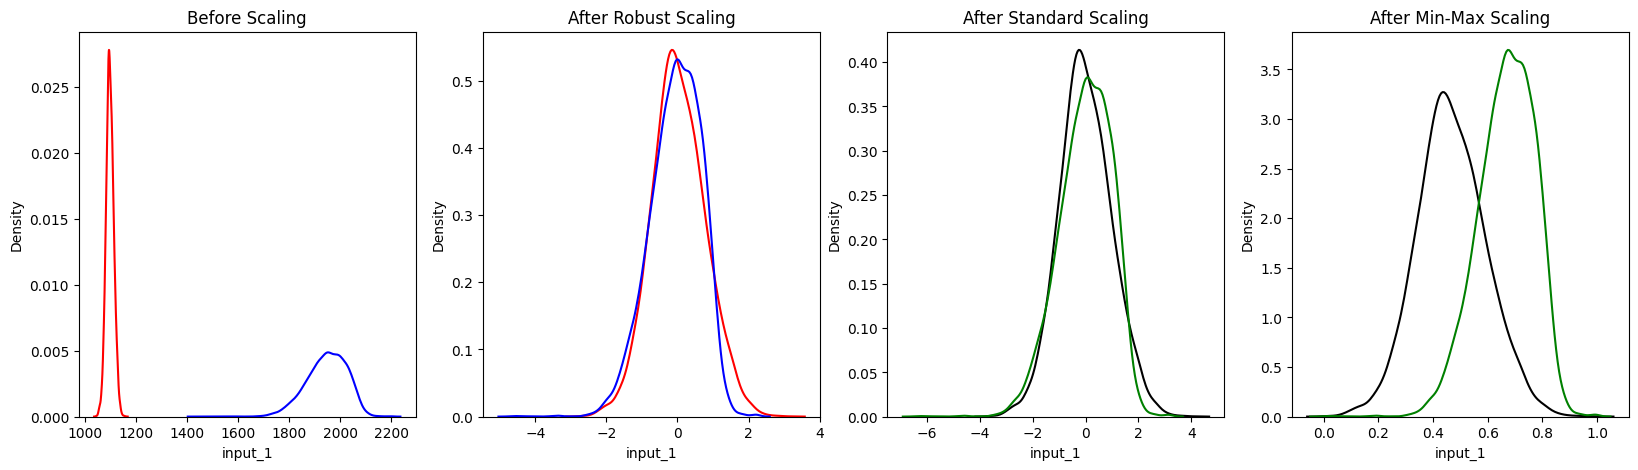

#### Тест

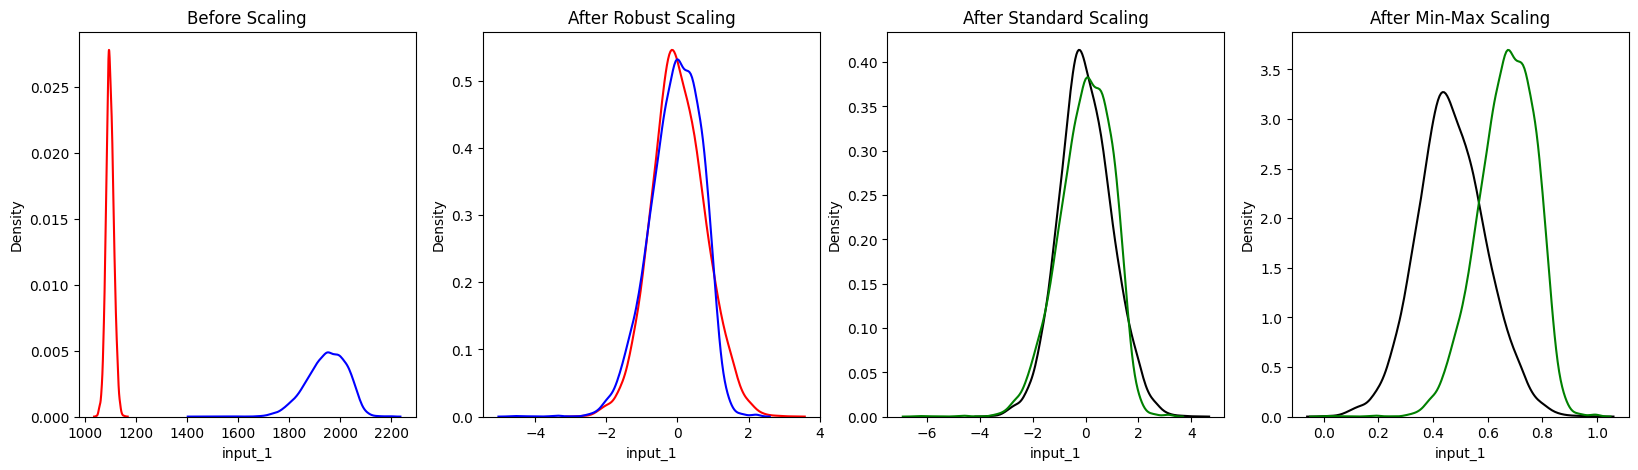

In [23]:
np.random.normal

features_testS = features[['input_1', 'input_2']]

scaler = RobustScaler()
robust_df = scaler.fit_transform(features_testS)
robust_df = pd.DataFrame(robust_df, columns=['input_1', 'input_2'])

scaler = StandardScaler()
standard_df = scaler.fit_transform(features_testS)
standard_df = pd.DataFrame(standard_df, columns=['input_1', 'input_2'])

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(features_testS)
minmax_df = pd.DataFrame(minmax_df, columns=['input_1', 'input_2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(features_testS['input_1'], ax = ax1, color ='r')
sns.kdeplot(features_testS['input_2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['input_1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['input_2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['input_1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['input_2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['input_1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['input_2'], ax = ax4, color ='g')
plt.show()

### StandardScaler

StandardScaler следует стандартному нормальному распределению (SND) . Следовательно, среднее значение = 0 и масштабирует данные до единичной дисперсии.

In [40]:
scl = StandardScaler().fit(features)
features_final=scl.transform(features)

### MinMaxScaler

MinMaxScaler масштабирует все объекты данных в диапазоне [0, 1] или в диапазоне [-1, 1] , если в наборе данных есть отрицательные значения. Это масштабирование сжимает все вставки в узком диапазоне [0, 0,005] .

In [18]:
min_max_scaler = MinMaxScaler()
features_final = min_max_scaler.fit_transform(features)

При наличии выбросов StandardScaler не гарантирует сбалансированность масштабов признаков из-за влияния выбросов при вычислении эмпирического среднего значения и стандартного отклонения. Это приводит к сужению диапазона значений признака.

### RobustScaler

Используя RobustScaler(), мы можем удалить выбросы, а затем использовать StandardScaler или MinMaxScaler для предварительной обработки набора данных.

Он масштабирует функции, используя статистику, устойчивую к выбросам.

Этот метод удаляет медиану и масштабирует данные в диапазоне от 1-го квартиля до 3-го квартиля. т. е. между 25-м квантилем и 75-м квантилем диапазоном. Этот диапазон также называется Межквартильным диапазоном.
Затем медиана и межквартильный размах сохраняются, чтобы их можно было использовать в будущих данных с помощью метода преобразования. Если в наборе данных присутствуют выбросы, то медиана и межквартильный размах дают лучшие результаты и превосходят выборочное среднее и дисперсию.

RobustScaler использует межквартильный диапазон, чтобы обеспечить устойчивость к выбросам.

In [24]:
robust_scaler = RobustScaler()
features_final = robust_scaler.fit_transform(features)

## Split data

Разделение на тестовую/обучающую выборки

In [25]:
from sklearn.model_selection import train_test_split


features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=False, test_size=0.10)

features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, shuffle=False, test_size=0.20)

# REGRESSION ANALYSIS
Регрессионный анализ
*   LinearRegression
*   Lasso
*   Ridge
*   ElasticNet



In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## LinearRegression

Линейная регрессия (scikit-learn LinearRegression) — это самая базовая форма, в которой модель вообще не наказывается за выбор весов. Это означает, что на этапе обучения, если модель чувствует, что какая-то конкретная функция особенно важна, модель может придать этой функции большое значение. Иногда это приводит к переобучению в небольших наборах данных.

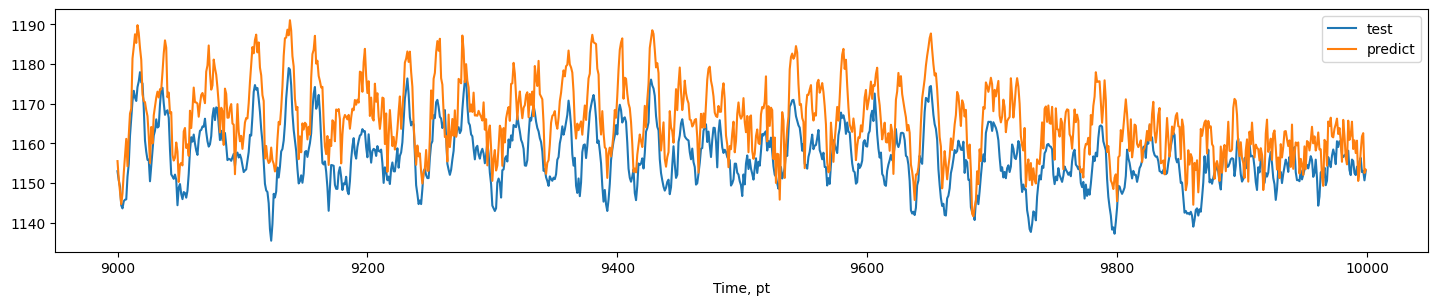

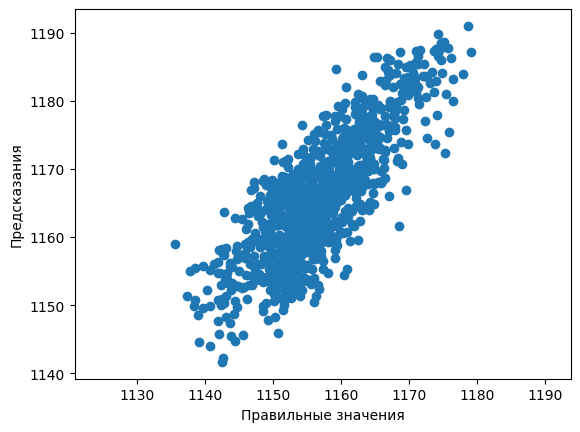

MSE:  111.748
R2:  -1.014


In [27]:
from utils.evaluate_model import evaluate


LR_model = LinearRegression().fit(features_train, target_train)
evaluate(model=LR_model, features=features_test, target=target_test)

## Lasso

Лассо (scikit-learn Lasso) — это модификация линейной регрессии, в которой модель наказывается за сумму абсолютных значений весов. Таким образом, абсолютные значения веса будут (в целом) уменьшены, и многие из них будут стремиться к нулю.

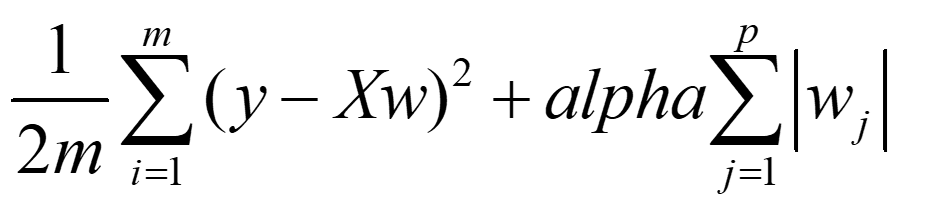

Гиперпараметр альфа — коэффициент для штрафных весов.

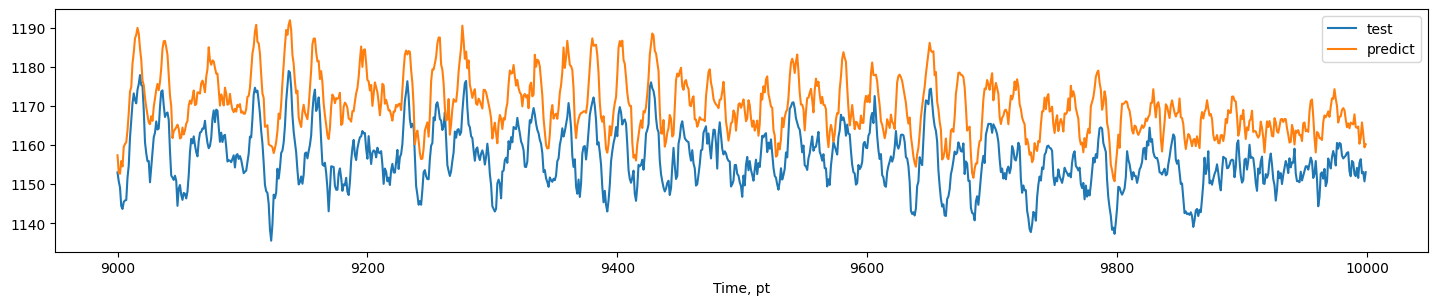

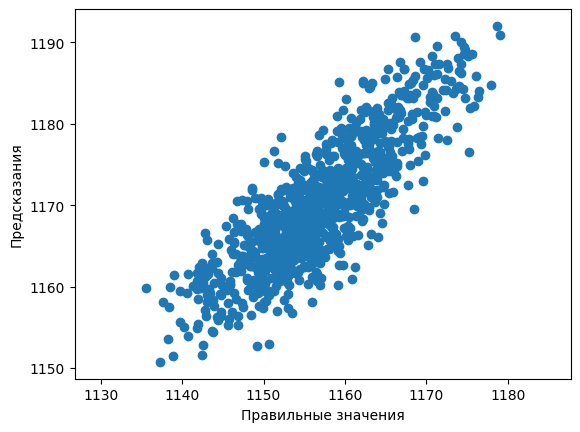

MSE:  194.583
R2:  -2.506


In [28]:
from utils.evaluate_model import evaluate


L_model = Lasso(alpha=1).fit(features_train, target_train)
evaluate(model=L_model, features=features_test, target=target_test)

## Ridge

Ridge (scikit-learn Ridge) идет еще дальше и штрафует модель на сумму квадратов значений весов. Таким образом, веса не только имеют тенденцию иметь меньшие абсолютные значения, но также имеют тенденцию наказывать экстремумы весов, в результате чего группа весов распределяется более равномерно.
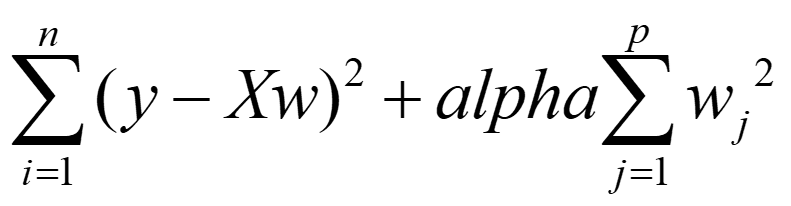

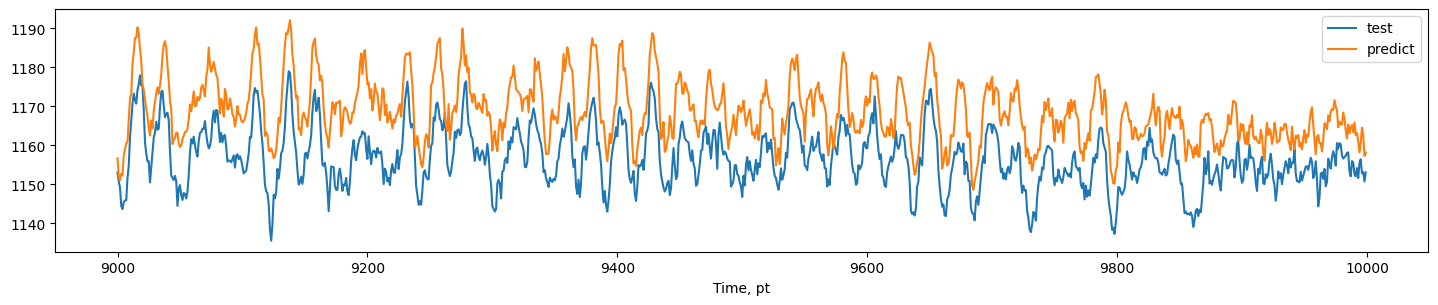

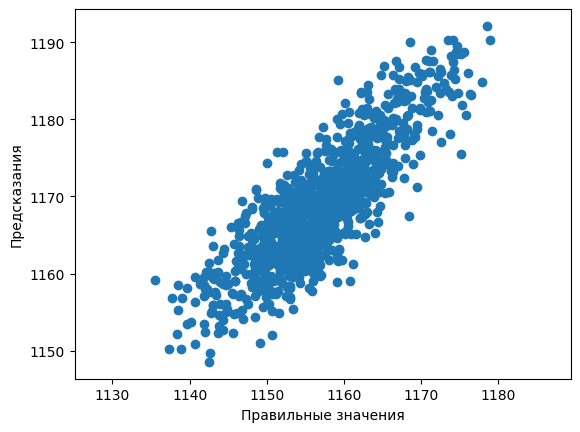

MSE:  163.817
R2:  -1.952


In [36]:
from utils.evaluate_model import evaluate


R_model = Ridge(alpha=2).fit(features_train, target_train)
evaluate(model=R_model, features=features_test, target=target_test)

## ElasticNet

ElasticNet — это гибрид Lasso и Ridge, в который включены как штрафные санкции по абсолютным значениям, так и квадратичные штрафные санкции, регулируемые другим коэффициентом l1_ratio.

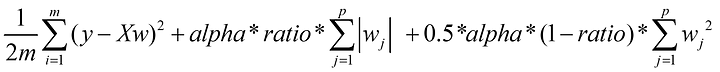

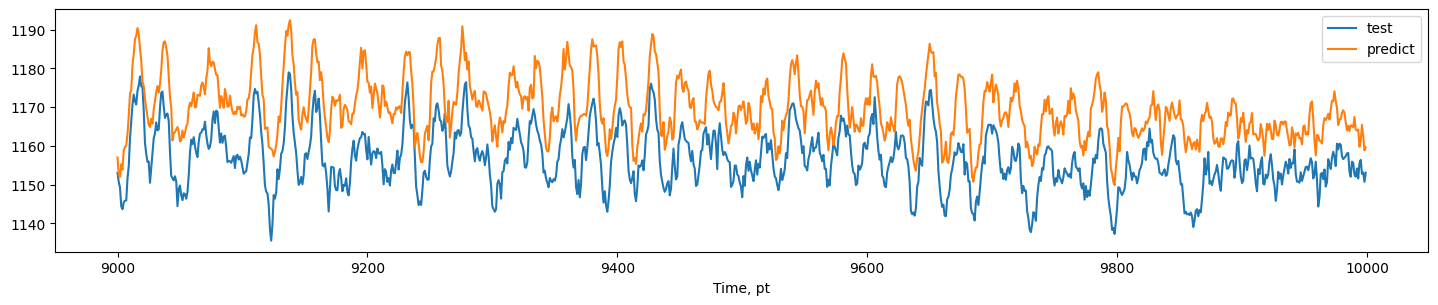

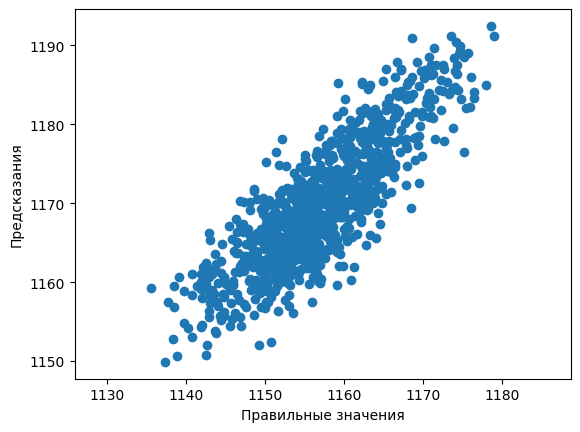

MSE:  186.951
R2:  -2.369


In [45]:
from utils.evaluate_model import evaluate


EN_model = ElasticNet(alpha=0.01, l1_ratio=0.25).fit(features_train, target_train)
evaluate(model=EN_model, features=features_test, target=target_test)

Вывод:

1.  **Прежде чем использовать методы регуляризованной линейной регрессии, необходимо будет масштабировать данные.**

2.  **Lasso, Ridge, ElasticNet для набора данных меньше 100 тыс. строк.**

3.  **Lasso и ElasticNet имеют тенденцию давать редкие веса (большинство нулей).**

    Это связанно с тем, что регуляризация l1 одинаково заботится о снижении больших весов до малых весов или о приведении малых весов к нулю. 
    Если много предикторов (функций) и не все из них так важны, то использование Lasso и ElasticNet - хорошая идея.
    
4.  **Ridge имеет тенденцию давать небольшие, но хорошо распределенные веса.** 
    
    Так как регуляризация l2 больше заботится о приведении большого веса к малому весу, а не о приведении малых весов к нулю. 
    Если есть несколько предикторов, и все они действительно подходят для прогнозов, Ridge хороший метод регуляризованной линейной регрессии.

# KERAS MODELS

In [138]:
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.activations import linear

## Test 1.0

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.
Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [177]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(150))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_256 (Dense)           (None, 200)               1200      
                                                                 
 activation_172 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_257 (Dense)           (None, 100)               20100     
                                                                 
 activation_173 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dense_258 (Dense)           (None, 70)                7070      
                                                                 
 activation_174 (Activation  (None, 70)              

Epoch 1/20
144/144 [==============================] - 1s 4ms/step - loss: 21785.1191 - val_loss: 1184.1937
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 556.6791 - val_loss: 701.2554
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 491.9271 - val_loss: 1306.2689
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 506.3127 - val_loss: 1427.6168
Epoch 5/20
144/144 [==============================] - 0s 2ms/step - loss: 501.7967 - val_loss: 1074.8185
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 615.7109 - val_loss: 2003.3186
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 558.7321 - val_loss: 618.5139
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 624.7275 - val_loss: 309.0352
Epoch 9/20
144/144 [==============================] - 0s 2ms/step - loss: 653.3350 - val_loss: 930.4300
Epoch 10/20
144/144 [==============================] - 0s

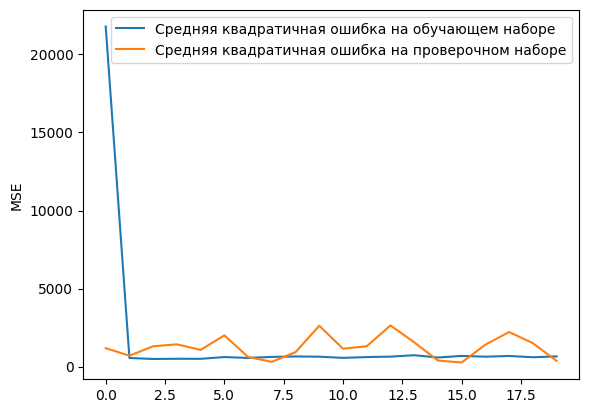

In [178]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 1ms/step


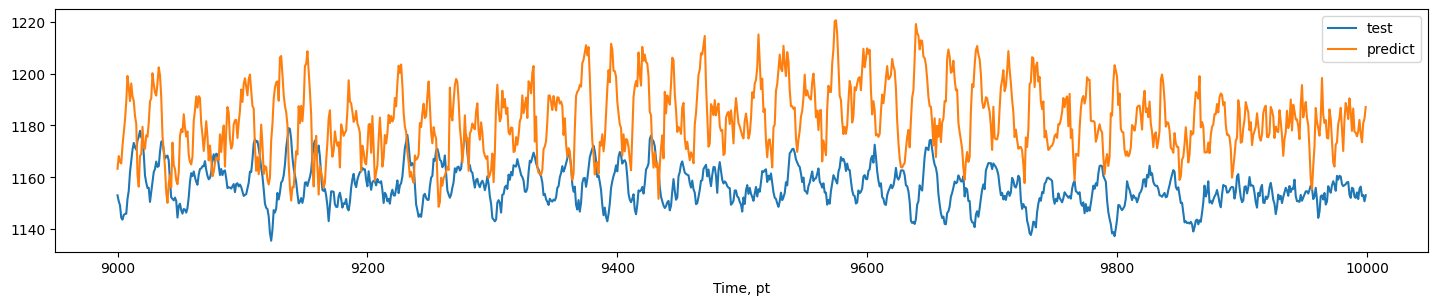

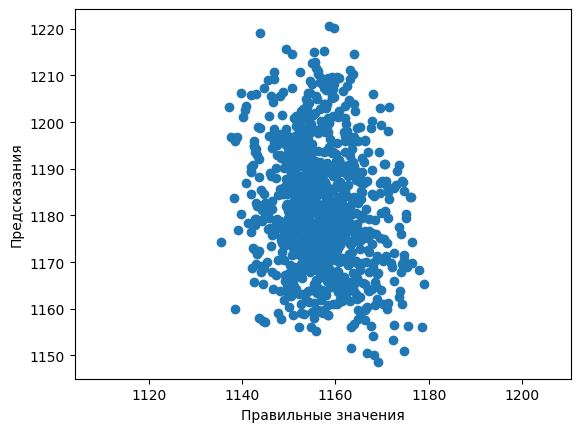

MSE:  900.616
R2:  -15.228


In [180]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

## Test 2.0

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.

*** Скрытый слой 3 реализован через слой с плотными связями и линейной функцией активации. Добавлен слой Dropout случайным образом устанавливающий 5% входных нейронов равными 0 на каждом шаге во время обучения, что помогает предотвратить переобучение. С добавлением слоя пакетной нормализации - применяет преобразование, которое поддерживает средний выходной сигнал близким к 0, а выходное стандартное отклонение близким к 1.***

Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [174]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))


Dense_model.add(Dense(150))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.05))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_250 (Dense)           (None, 200)               1200      
                                                                 
 activation_166 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_251 (Dense)           (None, 100)               20100     
                                                                 
 activation_167 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dense_252 (Dense)           (None, 70)                7070      
                                                                 
 activation_168 (Activation  (None, 70)              

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 1085192.5000 - val_loss: 9915100.0000
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 71822.4062 - val_loss: 1745258.3750
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 4577.3018 - val_loss: 276760.8438
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 4253.5586 - val_loss: 8956.2227
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 4128.0098 - val_loss: 5645.9263
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 3968.4531 - val_loss: 433.2528
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 3740.8313 - val_loss: 4052.3142
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 3433.8313 - val_loss: 397.6772
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 3404.1936 - val_loss: 11576.9053
Epoch 10/20
144/144 [=========================

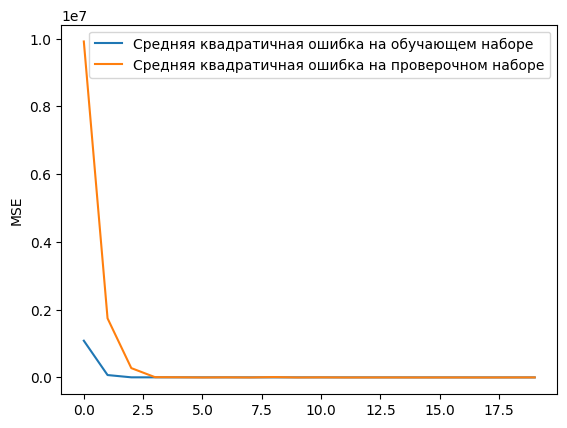

In [175]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

 1/32 [..............................] - ETA: 2s

32/32 [==============================] - 0s 2ms/step


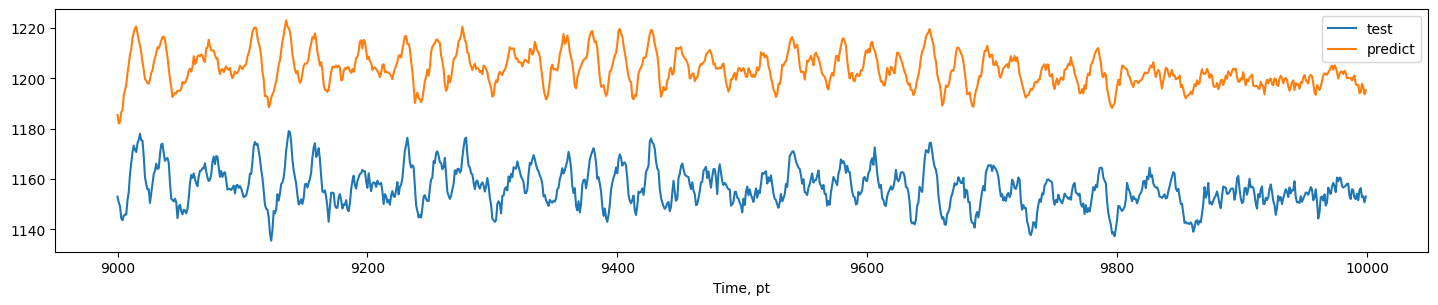

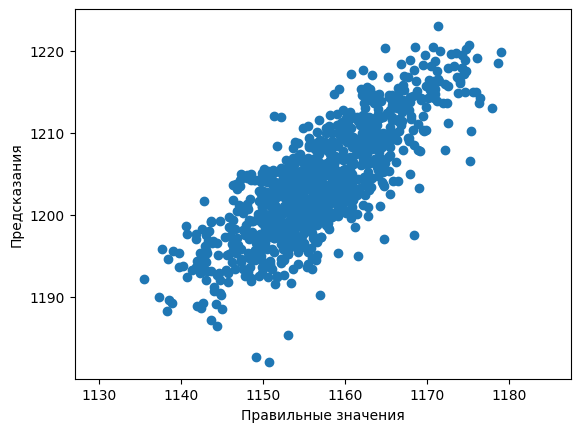

MSE:  2218.012
R2:  -38.966


In [176]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### Test 2.1

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.

*** Dropout и Batchnormalization применены в первом скрытом слое.***

Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [171]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.05))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))


Dense_model.add(Dense(150))
Dense_model.add(Activation(linear))


Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_244 (Dense)           (None, 200)               1200      
                                                                 
 activation_160 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_245 (Dense)           (None, 100)               20100     
                                                                 
 activation_161 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dropout_39 (Dropout)        (None, 100)               0         
                                                                 
 batch_normalization_45 (Ba  (None, 100)             

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 715014.8750 - val_loss: 1283384.7500
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 117664.4297 - val_loss: 683955.6250
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 7142.9775 - val_loss: 1924.9193
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 642.8710 - val_loss: 75.3077
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 355.7936 - val_loss: 113.1297
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 289.2781 - val_loss: 313.8763
Epoch 7/20
144/144 [==============================] - 1s 4ms/step - loss: 310.6419 - val_loss: 636.4027
Epoch 8/20
144/144 [==============================] - 1s 4ms/step - loss: 385.0595 - val_loss: 329.9579
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 466.6214 - val_loss: 61.5930
Epoch 10/20
144/144 [==============================] - 0s 3ms/

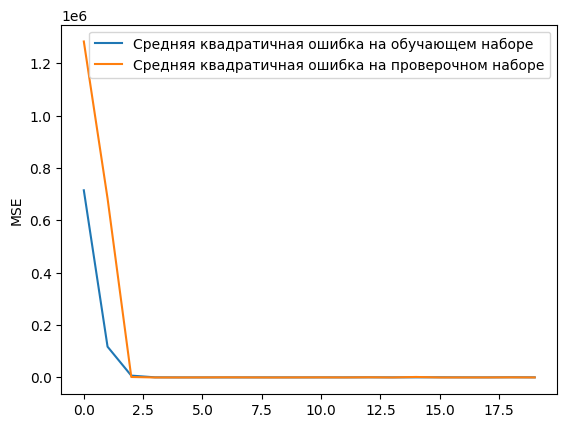

In [172]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 1ms/step


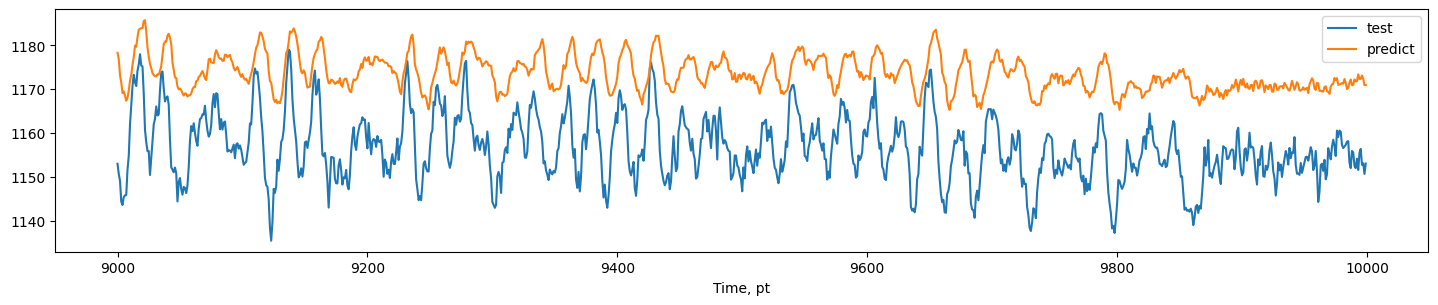

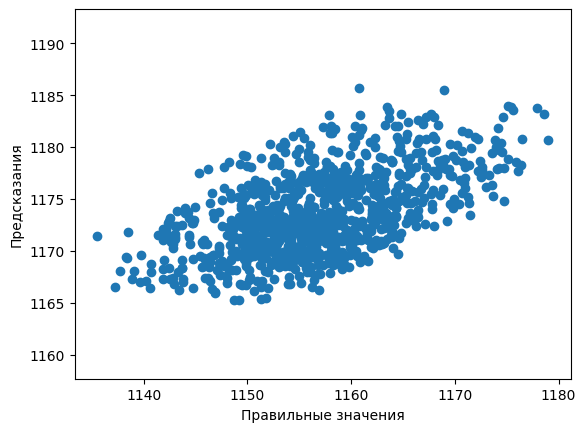

MSE:  324.78
R2:  -4.852


In [173]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### Test 2.2

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.

*** Dropout и Batchnormalization применены во втором скрытом слое.***

Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [168]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.05))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(150))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_238 (Dense)           (None, 200)               1200      
                                                                 
 activation_154 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_239 (Dense)           (None, 100)               20100     
                                                                 
 activation_155 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dense_240 (Dense)           (None, 70)                7070      
                                                                 
 activation_156 (Activation  (None, 70)              

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 809600.3750 - val_loss: 2100669.7500
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 108346.5859 - val_loss: 98060.6719
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 17058.2676 - val_loss: 50780.5195
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 13095.6348 - val_loss: 95379.8281
Epoch 5/20
144/144 [==============================] - 1s 4ms/step - loss: 10376.3721 - val_loss: 474.0738
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 9934.9355 - val_loss: 5647.5537
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 8273.2959 - val_loss: 296.6606
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 7861.3818 - val_loss: 7671.5259
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 7585.3472 - val_loss: 420.6265
Epoch 10/20
144/144 [==========================

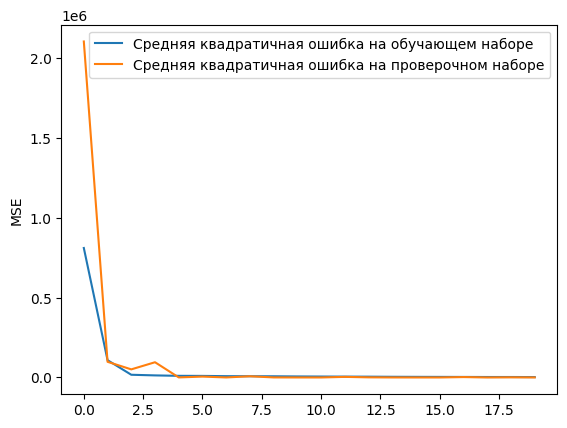

In [169]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


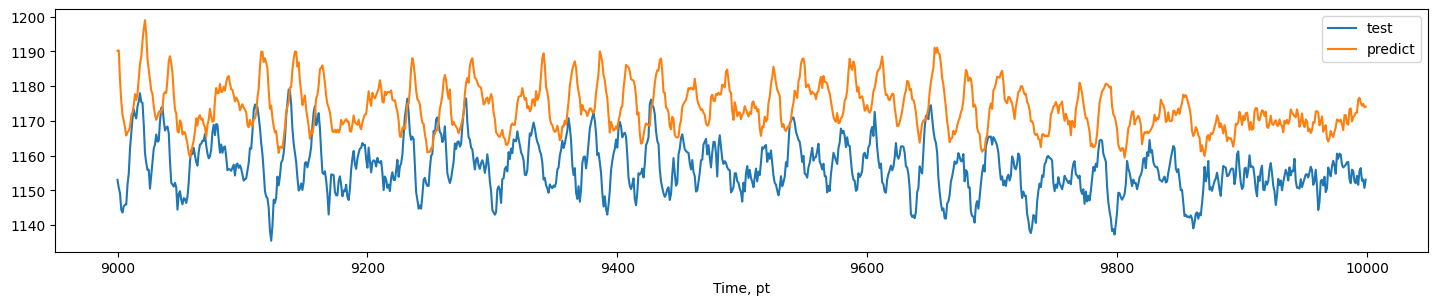

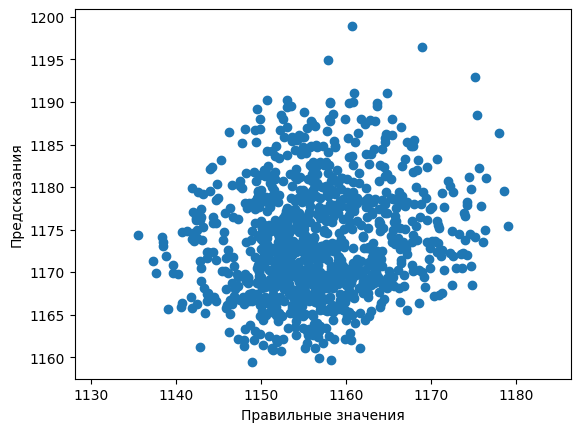

MSE:  374.66
R2:  -5.751


In [170]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### Test 2.3

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.

*** Dropout и Batchnormalization применены в четвертом скрытом слое.***

Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [165]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(150))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.05))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_232 (Dense)           (None, 200)               1200      
                                                                 
 activation_148 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_233 (Dense)           (None, 100)               20100     
                                                                 
 activation_149 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dense_234 (Dense)           (None, 70)                7070      
                                                                 
 activation_150 (Activation  (None, 70)              

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 1373236.5000 - val_loss: 1761337.8750
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 1302666.5000 - val_loss: 1269377.0000
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 1164617.1250 - val_loss: 1025919.5000
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 978506.9375 - val_loss: 557369.8750
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 769738.6250 - val_loss: 624008.4375
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 563485.3750 - val_loss: 426228.3125
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 380523.5938 - val_loss: 291864.5938
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 234412.7344 - val_loss: 153993.7656
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 130096.1172 - val_loss: 81713.0156
Epoch 10/20
144/

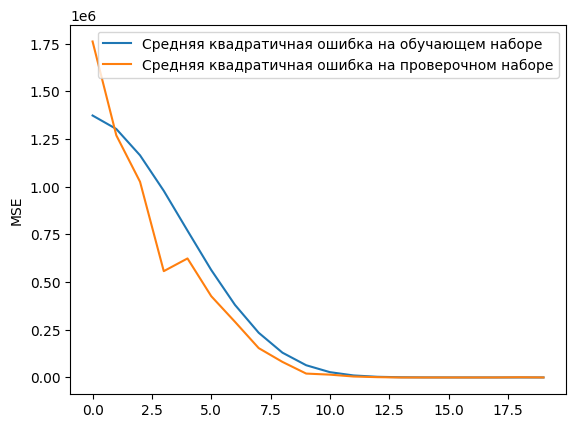

In [166]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


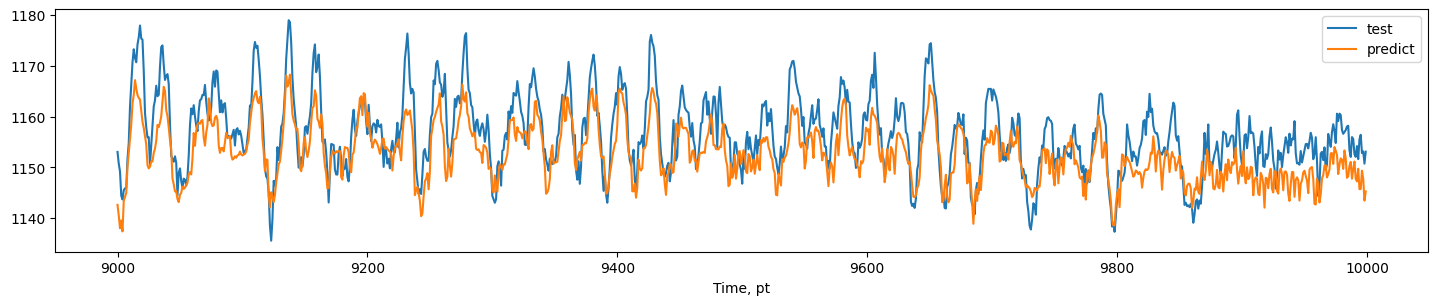

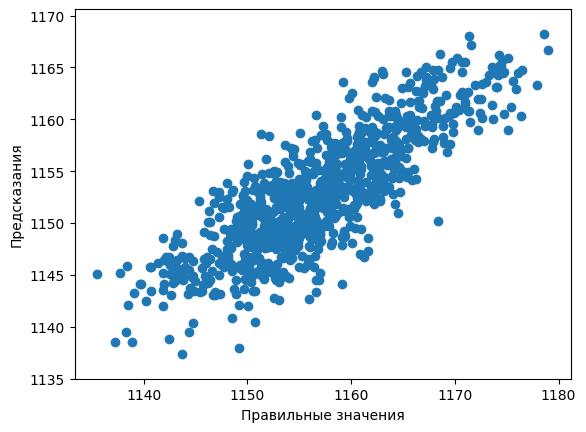

MSE:  33.286
R2:  0.4


In [167]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### ***------------ATTENTION------------***

In [ ]:
#---------------------ATTENTION---------------------#
#
# Замечена зависимость между положением включения связки Dropout + Batchnormalization и результатами прогнозирования модели.
#
# Положение:  1 слой      2 слой      3 слой      4 слой
#
# MSE:        #3568.629    1528.19     86.497      27.76       
# R2:         -46.536     -19.356     -0.152      0.63
#
#---------------------------------------------------#

Предлагается объединить связки 3 и 4 слои для получения наилучшего результата.

### Test 2 FIN

#### Test 2 FIN [1]

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.

*** Dropout и Batchnormalization применены в третьем и четвертом скрытых слоях.***

Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [162]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(150))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.05))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.05))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_226 (Dense)           (None, 200)               1200      
                                                                 
 activation_142 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_227 (Dense)           (None, 100)               20100     
                                                                 
 activation_143 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dense_228 (Dense)           (None, 70)                7070      
                                                                 
 activation_144 (Activation  (None, 70)              

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 1373413.5000 - val_loss: 1069329.3750
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 1302876.5000 - val_loss: 1176239.1250
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 1164718.8750 - val_loss: 1055251.8750
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 978590.9375 - val_loss: 735842.7500
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 769841.6250 - val_loss: 669559.0000
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 563544.6250 - val_loss: 468757.6250
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 380541.9688 - val_loss: 272218.2188
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 234432.5156 - val_loss: 175013.4531
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 130099.6406 - val_loss: 104804.0156
Epoch 10/20
144

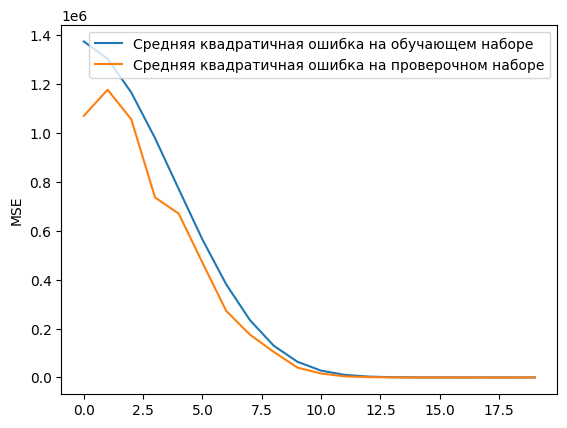

In [163]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


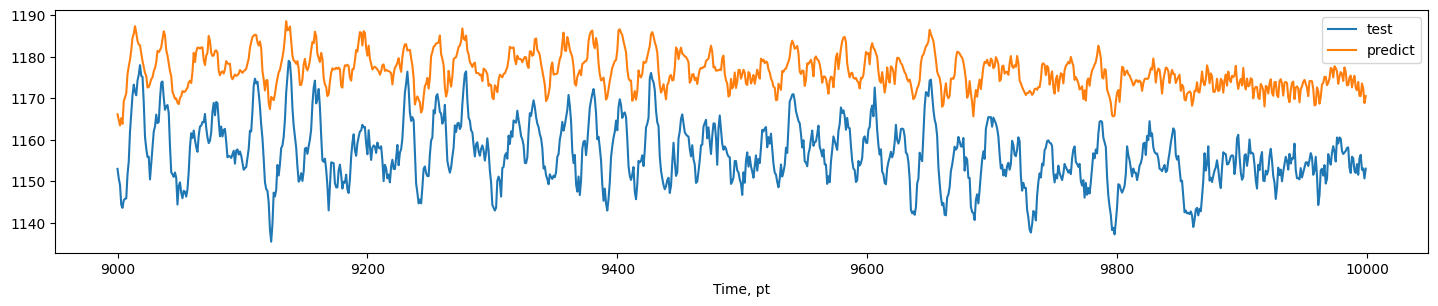

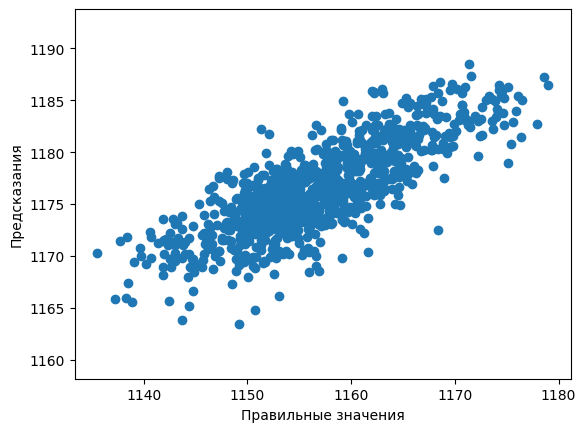

MSE:  412.274
R2:  -6.429


In [164]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

#### ***------------ATTENTION------------***
Заметно, что модель уловила тенденцию временого ряда. Принято решение уменьшить Dropout на 50%

#### Test 2 FIN [2]

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.

*** Dropout и Batchnormalization применены в третьем и четвертом скрытых слоях. Dropout 2.5%***

Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [154]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(150))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.025))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.025))
Dense_model.add(BatchNormalization())

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_214 (Dense)           (None, 200)               1200      
                                                                 
 activation_130 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_215 (Dense)           (None, 100)               20100     
                                                                 
 activation_131 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dense_216 (Dense)           (None, 70)                7070      
                                                                 
 activation_132 (Activation  (None, 70)              

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 1373115.1250 - val_loss: 1477081.7500
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 1302325.6250 - val_loss: 1156076.7500
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 1164180.2500 - val_loss: 1185140.2500
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 978130.3750 - val_loss: 855915.8125
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 769491.0625 - val_loss: 695750.5625
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 563313.9375 - val_loss: 417047.0625
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 380396.5000 - val_loss: 344641.0000
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 234344.4844 - val_loss: 192679.4844
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 130056.3359 - val_loss: 124263.5391
Epoch 10/20
144

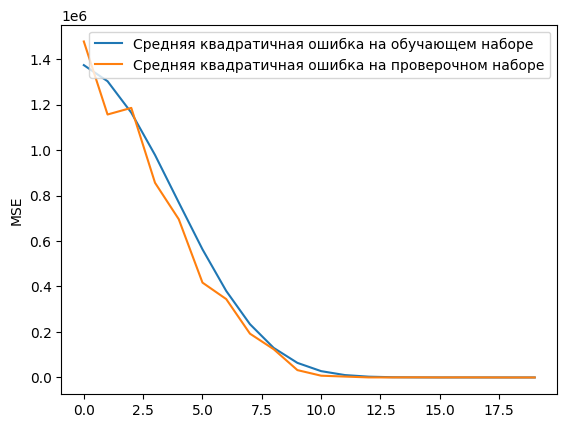

In [155]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 2ms/step


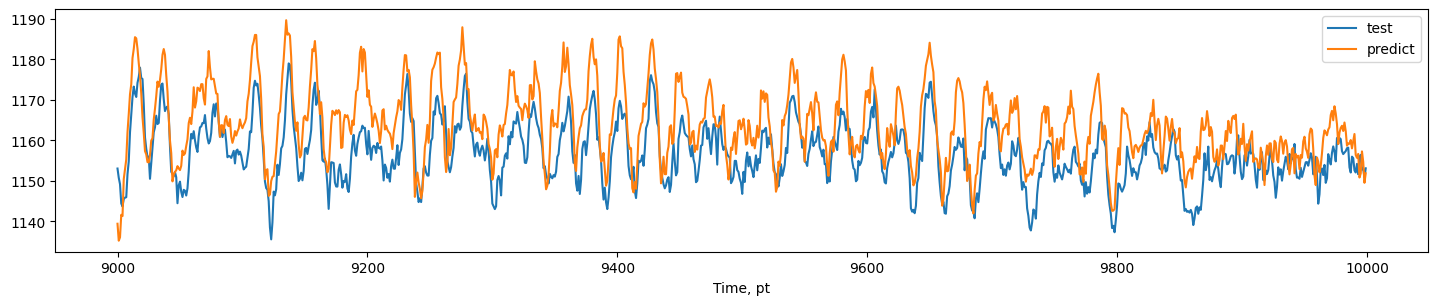

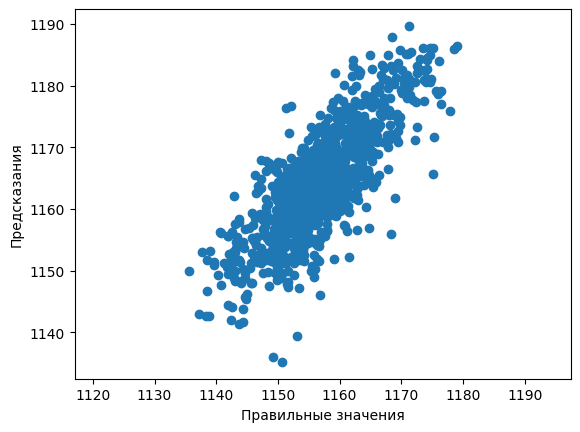

MSE:  81.272
R2:  -0.464


In [158]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

## Test 3.0

Последовательная модель в составе слои с плотными связями и линейной функцией активации. 1 входной слой, 4 скрытых слоя и 1 выходной слой.

*** Слой Dropout и Batchnormalization поменяны местами. Ожидается улучшение результата!***

Функция потерь реализована через MeanSquaredError - среднее значение квадратов ошибок между метками и прогнозами.
Оптимизатор, реализует алгоритм Адам (или метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.)

In [159]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1]))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(100))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(70))
Dense_model.add(Activation(linear))


Dense_model.add(Dense(150))
Dense_model.add(BatchNormalization())
Dense_model.add(Activation(linear))
Dense_model.add(Dropout(0.05))


Dense_model.add(Dense(300))
Dense_model.add(Activation(linear))

Dense_model.add(Dense(1))
Dense_model.add(Activation(linear))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 200)               1200      
                                                                 
 activation_136 (Activation  (None, 200)               0         
 )                                                               
                                                                 
 dense_221 (Dense)           (None, 100)               20100     
                                                                 
 activation_137 (Activation  (None, 100)               0         
 )                                                               
                                                                 
 dense_222 (Dense)           (None, 70)                7070      
                                                                 
 activation_138 (Activation  (None, 70)              

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 1152289.3750 - val_loss: 1506033.5000
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 54547.3320 - val_loss: 172949.5625
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 5995.5166 - val_loss: 311064.7188
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 5224.0322 - val_loss: 10188.4189
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 5256.2695 - val_loss: 9079.1240
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 4999.7163 - val_loss: 49104.1719
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 4866.4033 - val_loss: 8631.1553
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 4601.0493 - val_loss: 87.0885
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 4814.8589 - val_loss: 1031.7104
Epoch 10/20
144/144 [=========================

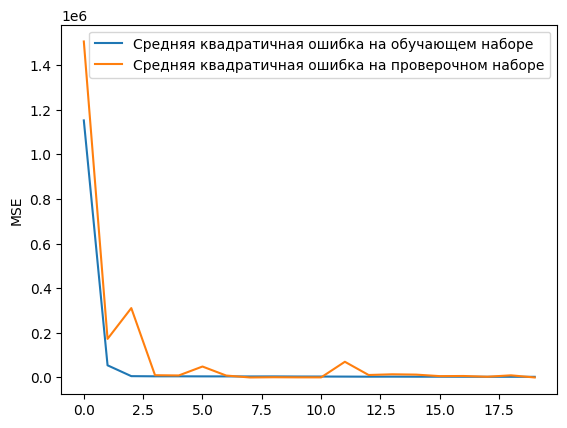

In [160]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


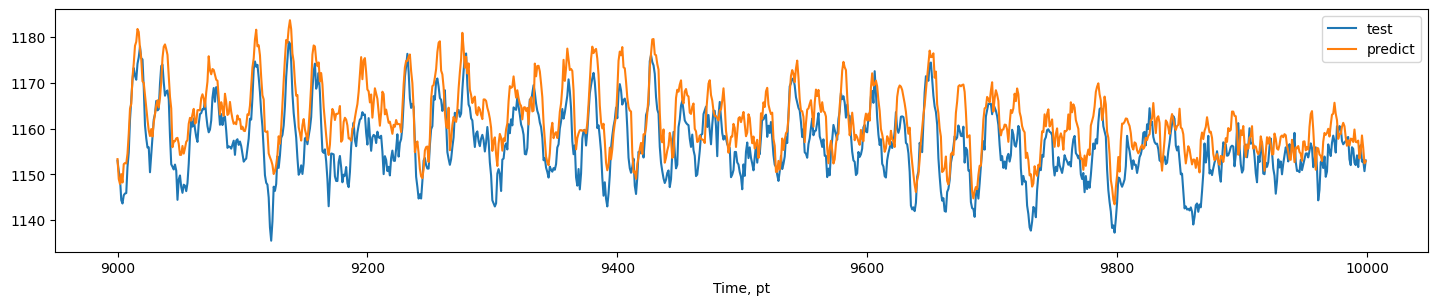

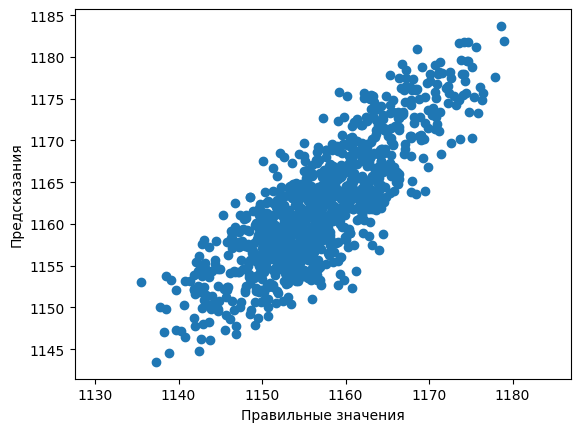

MSE:  45.881
R2:  0.173


In [161]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)